In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [3]:
df=pd.read_csv('delivery_time (1).csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df=df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df.duplicated().any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [7]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [9]:
df.shape

(21, 2)

In [10]:
df.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [11]:
target=df[['Delivery_Time']]
target

,Delivery_Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [12]:
features=df.drop('Delivery_Time',axis=1)
features

,Sorting_Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [13]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=40)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15, 1)
(15, 1)
(6, 1)
(6, 1)


In [15]:
lin_model=LinearRegression()

In [16]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred=lin_model.predict(x_test)
y_pred

array([[16.29106688],
       [14.63406847],
       [11.32007166],
       [22.91906051],
       [22.91906051],
       [12.97707006]])

In [18]:
y_test

,Delivery_Time
16,13.75
20,21.50
14,12.03
4,29.00
8,17.90
11,10.75


In [19]:
erro=y_test-y_pred
erro

,Delivery_Time
16,-2.541067
20,6.865932
14,0.709928
4,6.080939
8,-5.019061
11,-2.227070


In [20]:
lin_model.score(x_train,y_train)

0.841971006943874

In [21]:
lin_model.coef_

array([[1.65699841]])

In [22]:
lin_model.intercept_

array([6.34907643])

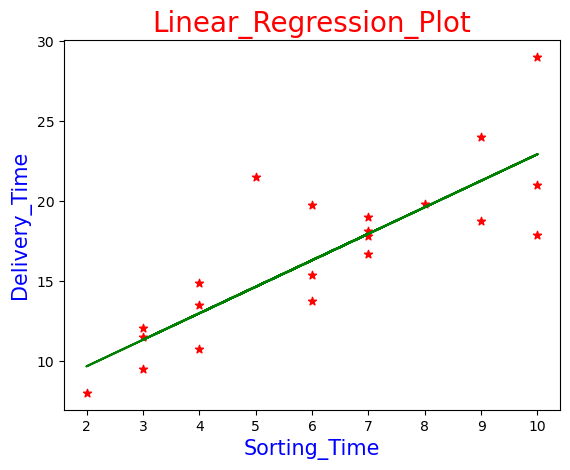

In [23]:
plt.scatter(df.Sorting_Time,df.Delivery_Time,color='red',marker='*')
plt.xlabel('Sorting_Time',size=15,color='blue',y=(10))
plt.ylabel('Delivery_Time',size=15,color='blue')
plt.title('Linear_Regression_Plot',size=20,color='red')
plt.plot(df.Sorting_Time,lin_model.predict(df[['Sorting_Time']]),color='green' )

In [35]:
linear_model1 = smf.ols('Delivery_Time~Sorting_Time', data = df).fit()

In [36]:
print('R-squared     :',linear_model1.rsquared.round(3))
print('Adj.R-squared :',linear_model1.rsquared_adj.round(3))
print('AIC Value     :',linear_model1.aic.round(3))
print('BIC Value     :',linear_model1.bic.round(3))

R-squared     : 0.682
Adj.R-squared : 0.666
AIC Value     : 106.714
BIC Value     : 108.803


In [37]:
linear_model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [39]:
linear_model2 = smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df).fit()

In [40]:
print('R-squared     :',linear_model2.rsquared.round(3))
print('Adj.R-squared :',linear_model2.rsquared_adj.round(3))
print('AIC Value     :',linear_model2.aic.round(3))
print('BIC Value     :',linear_model2.bic.round(3))

R-squared     : 0.729
Adj.R-squared : 0.715
AIC Value     : 15.464
BIC Value     : 17.553


In [41]:
linear_model2.params

Intercept                1.613479
np.sqrt(Sorting_Time)    1.002217
dtype: float64

In [43]:
linear_model3 = smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df).fit()

In [47]:
print('R-squared     :',linear_model3.rsquared.round(3))
print('Adj.R-squared :',linear_model3.rsquared_adj.round(3))
print('AIC Value     :',linear_model3.aic.round(3))
print('BIC Value     :',linear_model3.bic.round(3))

R-squared     : 0.772
Adj.R-squared : 0.76
AIC Value     : -16.581
BIC Value     : -14.492


In [49]:
linear_model3.params

Intercept               1.741987
np.log(Sorting_Time)    0.597522
dtype: float64

In [51]:
linear_model4 = smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = df).fit()

In [52]:
print('R-squared     :',linear_model4.rsquared.round(3))
print('Adj.R-squared :',linear_model4.rsquared_adj.round(3))
print('AIC Value     :',linear_model4.aic.round(3))
print('BIC Value     :',linear_model4.bic.round(3))

R-squared     : 0.744
Adj.R-squared : 0.731
AIC Value     : -22.071
BIC Value     : -19.982


In [53]:
print(linear_model.tvalues,'\n',linear_model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [55]:
linear_model.rsquared, linear_model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [57]:
pred1 = pd.DataFrame()
pred1['Sorting_Time'] = df.Sorting_Time
pred1['Delivery_Time'] = df.Delivery_Time
pred1['Predicted_Delivery_Time'] = pd.DataFrame(linear_model.predict(pred1.Sorting_Time))
pred1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


In [58]:
pred2 = pd.DataFrame()
pred2['Sorting_Time'] = df.Sorting_Time
pred2['Delivery_Time'] = df.Delivery_Time
pred2['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(linear_model4.predict(pred2.Sorting_Time)))
pred2

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918
